In [1]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
import h5py
import numpy as np

In [4]:
f = drive.CreateFile({'id':'1PEXoZmxT1MH9AuatTG4JuuzjcCU0Q2oS'}) # replace the id with id of file you want to access
f.GetContentFile('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5')

In [5]:
f =h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5','r')

In [7]:
X_train = f['X_train'][:]
y_train1= f['y_train'][:]
X_test= f['X_test'][:]
y_test1= f['y_test'][:]

In [8]:
f.close

<bound method File.close of <HDF5 file "Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>>

In [9]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential

In [10]:
from keras.utils import np_utils

In [11]:
from keras.layers import Dense, Dropout, Activation, Flatten

In [12]:
# fix random seed for reproducability 
seed = 7
np.random.seed(seed)

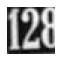

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


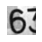

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


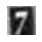

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


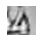

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


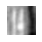

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


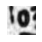

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


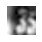

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


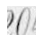

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


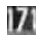

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


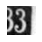

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.axis('off')
  plt.show()
  print('label for each of the above image:%s'%(y_train1[0:10]))

In [14]:
X_train= X_train.reshape(X_train.shape[0],1024)
X_test = X_test.reshape(X_test.shape[0],1024)

In [15]:
# #normalize inputs from 0-255 to 0-1
X_train= X_train/255.0
X_test =X_test/255.0
print('Training set',X_train.shape,y_train1.shape)
print('Testset',X_test.shape,y_test1.shape)

Training set (42000, 1024) (42000,)
Testset (18000, 1024) (18000,)


In [16]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train1)
y_test=np_utils.to_categorical(y_test1)

#no of classes
num_classes= y_test.shape[1]
num_hidden=32
num_classes

10

In [17]:
x_tr = []
for i in range (42000):
  x_tr.append(X_train[i,:].flatten())
x_te=[]
for i in range(18000):
  x_te.append(X_test[i,:].flatten())

In [18]:
x_tr =x_tr[:2000]
x_te= x_te[:2000]

y_tr= y_train1[0:2000]
y_te =y_test1[0:2000]

In [23]:
print(len(x_tr))
print(len(y_tr))
print(len(x_te))
print(len(y_te))

2000
2000
2000
2000


In [24]:
a=[]
j=[]
def knnvalue(k):
  from sklearn.neighbors import KNeighborsClassifier
  NHH = KNeighborsClassifier(n_neighbors=k,weights='uniform')
  NHH.fit(x_tr,y_tr)
  predicted_labels= NHH.predict(x_te)
  from sklearn.metrics import accuracy_score
  ascore= accuracy_score(y_te,predicted_labels)
  MSE= 1-ascore
  a.append(MSE)
  j.append(k)
  print(ascore)

In [25]:
for i in range(1,30,2):
  knnvalue(i)

0.2975
0.292
0.3015
0.307
0.3055
0.311
0.2975
0.294
0.2975
0.2935
0.2945
0.2955
0.2865
0.2805
0.279


# for the above run the KNN value is the lowest for K=11

In [26]:
from sklearn.neighbors import KNeighborsClassifier
NHH = KNeighborsClassifier(n_neighbors=11,weights='uniform')
NHH.fit(x_tr,y_tr)
pred= NHH.predict(x_te)

In [27]:
len(pred)

2000

In [28]:
pred[0]

6

In [29]:
pred[1]

0

In [30]:
y_te[0]

1

In [31]:
# Finding out the confusion matrix and accuracy 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(pred,y_te))

              precision    recall  f1-score   support

           0       0.48      0.29      0.36       363
           1       0.55      0.31      0.40       325
           2       0.39      0.26      0.31       277
           3       0.19      0.22      0.21       164
           4       0.46      0.42      0.44       219
           5       0.20      0.33      0.25       132
           6       0.25      0.27      0.26       190
           7       0.32      0.49      0.39       132
           8       0.10      0.32      0.15        60
           9       0.18      0.26      0.21       138

    accuracy                           0.31      2000
   macro avg       0.31      0.32      0.30      2000
weighted avg       0.37      0.31      0.32      2000



From above classification we can say that KNN is not suitable model need to explore more.

In [32]:
# define model
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout,MaxPooling2D
from keras.layers import BatchNormalization

In [33]:
# create model
def nn_model():
  model= Sequential()
  model.add(BatchNormalization(input_shape=((1024,)))) 
  model.add(Dense(256,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  # compile the model
  sgd= optimizers.Adam(lr =1e-3)
  model.compile(loss=losses.categorical_crossentropy,optimizer=sgd,metrics=['accuracy'])
  return model
# Build the model
model = nn_model()
# Fit the model
history = model.fit(X_test,y_test, validation_data=(X_test,y_test),epochs=30,batch_size=200,verbose=2)
scores= model.evaluate(X_test,y_test,verbose=0)
print("Error:%.2f%%" %(100-scores[1]*100))
model.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
90/90 - 19s - loss: 1.9698 - accuracy: 0.3084 - val_loss: 1.9261 - val_accuracy: 0.4967
Epoch 2/30
90/90 - 1s - loss: 1.2313 - accuracy: 0.6099 - val_loss: 1.3118 - val_accuracy: 0.6788
Epoch 3/30
90/90 - 1s - loss: 0.9997 - accuracy: 0.6913 - val_loss: 1.0210 - val_accuracy: 0.7187
Epoch 4/30
90/90 - 1s - loss: 0.8856 - accuracy: 0.7228 - val_loss: 0.8009 - val_accuracy: 0.7684
Epoch 5/30
90/90 - 1s - loss: 0.7963 - accuracy: 0.7505 - val_loss: 0.7216 - val_accuracy: 0.7820
Epoch 6/30
90/90 - 1s - loss: 0.7410 - accuracy: 0.7696 - val_loss: 0.6460 - val_accuracy: 0.8032
Epoch 7/30
90/90 - 1s - loss: 0.6808 - accuracy: 0.7886 - val_loss: 0.6407 - val_accuracy: 0.8012
Epoch 8/30
90/90 - 1s - loss: 0.6394 - accuracy: 0.7998 - val_loss: 0.5485 - val_accuracy: 0.8287
Epoch 9/30
90/90 - 1s - loss: 0.6132 - accuracy: 0.8059 - val_loss: 0.5373 - val_accuracy: 0.8353
Epoch 10/30
90/90 - 1s - loss: 0.5705 - accuracy: 0.8213 - val_loss: 0.4690 - val_accuracy: 0.8585
Epoch 11/30
90/90 

In [34]:
Y_pred= model.predict(X_test)
print(np.argmax(Y_pred[2]))
print(np.argmax(y_test[2]))
print(history.history.keys())

2
2
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Error = 6.56% and accuracy = 0.9224
# Deep learning is able to work on huge amount of data set especially with multi-dimensional data and was able to perform better than KNN

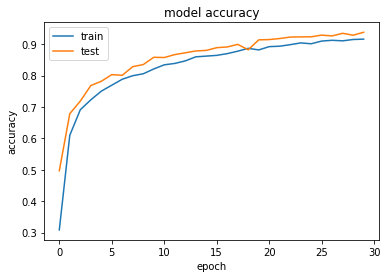

In [35]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


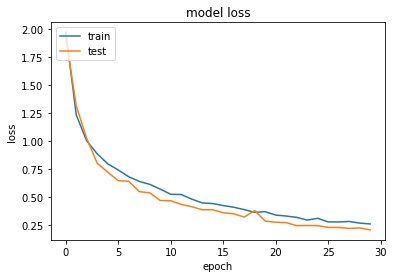

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()